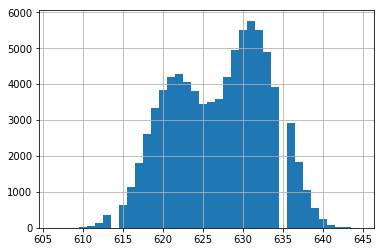

In [1]:
import pandas as pd       ###hist_600###
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_600.txt", delimiter=" ",
                    header=None, names = ("date","time","ir","lidar"))

data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

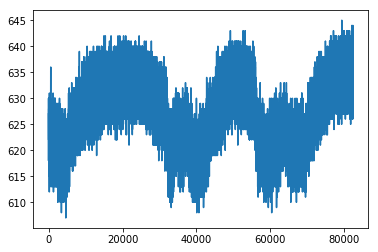

In [2]:
data.lidar.plot()
plt.show()

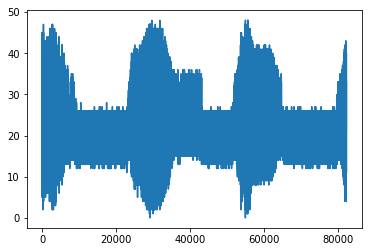

In [3]:
data.ir.plot()
plt.show()

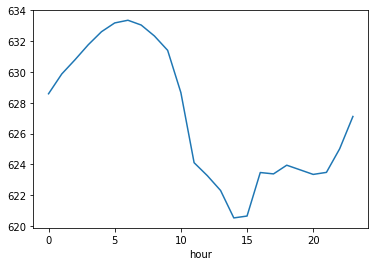

In [4]:
data["hour"] = [e//10000 for e in data.time]  ###hourly_mean###
d = data.groupby("hour")
d.lidar.mean().plot()
plt.show()

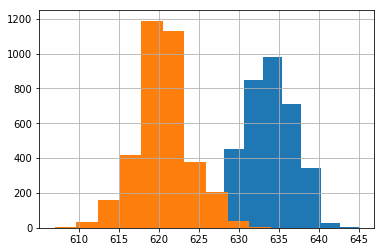

In [5]:
d.lidar.get_group(6).hist()     ###two_mode_hist###
d.lidar.get_group(14).hist()
plt.show()

In [6]:
freqs = pd.DataFrame()   #頻度を入れるデータフレーム  ###calc_joint_probs###
for i in range(24):
    freqs[i] = d.lidar.get_group(i).value_counts().sort_index()

freqs = freqs.fillna(0)     #欠損値(NaN)を0で埋める
probs = freqs/len(data) #頻度を確率で

probs #表示

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
618,0.000036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004326,0.003791,0.001106,0.001750,0.001774,0.002272,0.002916,0.003135,0.001908,0.000401
619,0.000219,0.000049,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004982,0.004301,0.001810,0.002697,0.002309,0.003341,0.003657,0.003475,0.002539,0.000729
620,0.000389,0.000073,0.000036,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005140,0.005371,0.002892,0.003013,0.002710,0.004119,0.003900,0.003621,0.002685,0.001021
621,0.000559,0.000158,0.000036,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000,0.000000,...,0.004921,0.005650,0.003912,0.003706,0.003196,0.004435,0.003512,0.003985,0.003451,0.001895
622,0.001033,0.000219,0.000085,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000061,...,0.004799,0.005030,0.005407,0.004411,0.004180,0.003755,0.003062,0.003038,0.003475,0.002333
623,0.001604,0.000535,0.000231,0.000036,0.000049,0.000012,0.000012,0.000024,0.000012,0.000036,...,0.003985,0.003888,0.006185,0.004471,0.003864,0.002710,0.002357,0.002345,0.003268,0.003268
624,0.002175,0.000972,0.000547,0.000194,0.000061,0.000049,0.000024,0.000049,0.000097,0.000134,...,0.002782,0.003171,0.005553,0.004338,0.004301,0.002539,0.001835,0.001944,0.002685,0.003475
625,0.003062,0.001823,0.000911,0.000462,0.000146,0.000049,0.000085,0.000109,0.000292,0.000413,...,0.001823,0.002248,0.005152,0.003937,0.003669,0.001847,0.001106,0.001349,0.002369,0.003062
626,0.003742,0.002685,0.001507,0.001094,0.000462,0.000243,0.000219,0.000377,0.000559,0.000668,...,0.001349,0.001434,0.003755,0.003402,0.003524,0.001944,0.001252,0.001057,0.002066,0.003548
627,0.003840,0.003244,0.002078,0.001689,0.000887,0.000608,0.000522,0.000571,0.000923,0.001094,...,0.000778,0.000717,0.002880,0.003074,0.003147,0.001981,0.001130,0.001215,0.001859,0.003196


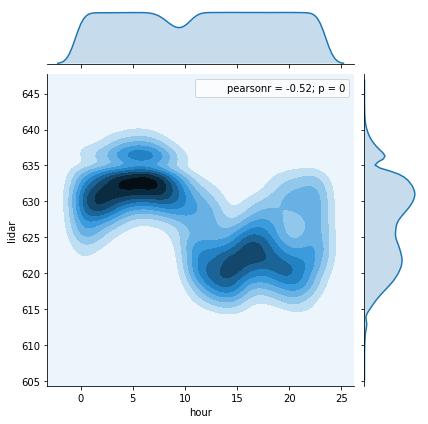

In [7]:
import seaborn as sns   ###2d_hist###

sns.jointplot(data["hour"], data["lidar"], data, kind="kde")
plt.show()

In [8]:
#sns.jointplot(data["hour"], data["ir"], data, kind="kde")
#plt.show()

In [9]:
p_t = pd.DataFrame(probs.sum())   #各列を合計              ###marginalize###（p_xの合計の行まで）
p_t

,0
0,0.043013
1,0.042916
2,0.042879
3,0.042916
4,0.042940
5,0.043037
6,0.043025
7,0.042952
8,0.038675
9,0.028651


In [10]:
p_t.sum()    # 桁落ちで少し値が欠けるがほぼ1になる

0    0.949247
dtype: float64

In [11]:
p_x = pd.DataFrame(probs.transpose().sum())        #行と列を転置して各列を合計
p_x

,0
618,0.031628
619,0.040498
620,0.046585
621,0.050947
622,0.051980
623,0.049319
624,0.046354
625,0.041725
626,0.042648
627,0.043645


In [12]:
p_x.sum()

0    0.949247
dtype: float64

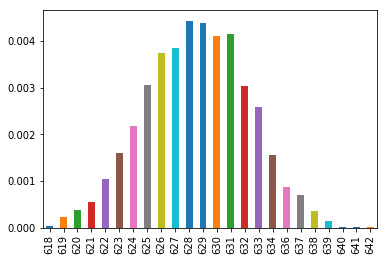

In [13]:
probs[0].plot.bar()   ###joint_x_t0###
plt.show()

In [18]:
print("P(x, t=0)の合計:", probs[0].sum())  ###joint_x_t0_sum###

P(x, t=0)の合計: 0.0430128431003


In [19]:
print("P(t=0):", p_t[0].values[0])   #p_tの「0」という列の0番目のデータ ###p_t0###

P(t=0): 0.0430128431003


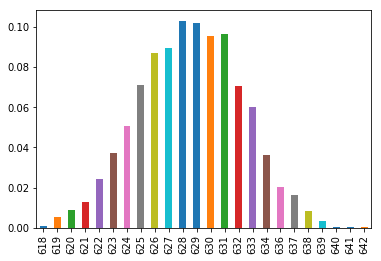

In [20]:
(probs[0]/p_t[0].values[0]).plot.bar()  ###p(x|t)###
plt.show()

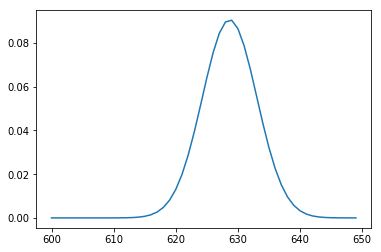

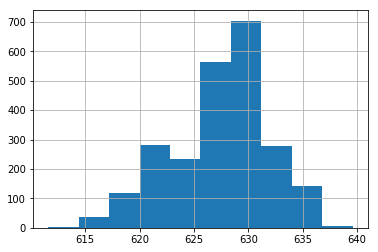

In [15]:
from scipy.stats import norm          ###plot_gauss_10###

def gauss_hour_plot(t):
    mean = d.lidar.get_group(t).mean()
    std = d.lidar.get_group(t).std()

    xs = range(600,650)
    ys = [norm.pdf(x, mean, std) for x in xs]

    plt.plot(xs,ys)
    
gauss_hour_plot(10)
plt.show()

d.lidar.get_group(10).hist(align='left')
plt.show()

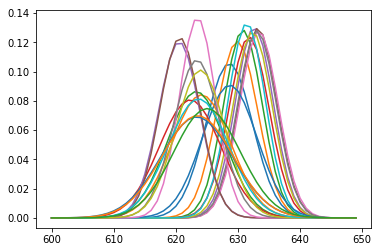

In [16]:
for t in range(0,23): gauss_hour_plot(t)   ###all_pdfs###
plt.show() 